# Setup & Usage

1. Install Anaconda Python
2. Create a python virtual environment
3. Install root in your new virtual environment with `conda install root -c conda-forge`
4. Start a jupyter notebook session, open this notebook.

# Interesting Links

- [Jupyter notebooks running ROOT](https://github.com/root-project/root/tree/master/bindings/pyroot/JupyROOT)
- [Sklearn Gaussian Mixture Models](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- [Installing Root for Python](https://github.com/NLeSC/root-conda-recipes/issues/34#issuecomment-459373774)
- [PyROOT](https://root.cern.ch/pyroot)

# Introduction

First, lets check to see what we've got in our local directory

In [1]:
%%bash
ls -ltrh

total 1.4M
-rw-r--r-- 1 mikebeaumier mikebeaumier 1.4M May 28 18:05 merged_18087041.root
-rw-r--r-- 1 mikebeaumier mikebeaumier  291 May 28 18:07 README.md
-rw-r--r-- 1 mikebeaumier mikebeaumier  29K May 29 08:02 jupyter_notebook_config.py
-rw-r--r-- 1 mikebeaumier mikebeaumier 3.9K May 29 08:12 PyRoot Demo.ipynb


In [2]:
import ROOT

Welcome to JupyROOT 6.16/00


In [13]:
file = ROOT.TFile("./merged_18087041.root")

In [9]:
directory = file.GetDirectory('.')

In [12]:
def getall(d, basepath="/"):
    "Generator function to recurse into a ROOT file/dir and yield (path, obj) pairs"
    for key in d.GetListOfKeys():
        kname = key.GetName()
        if key.IsFolder():
            # TODO: -> "yield from" in Py3
            for i in getall(d.Get(kname), basepath+kname+"/"):
                yield i
        else:
            yield basepath+kname, d.Get(kname)

In [15]:
for k, o in getall(file):
    print(o.ClassName(), k)

TH1F /Xing
TH2F /corrAdc_d8
TH2F /corrAdc_d9
TH2F /corrAdc_d10
TH2F /corrAdc_d11
TH2F /fpsAdc
TH2F /fpostAdc


In [16]:
xing = file.Get('Xing')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


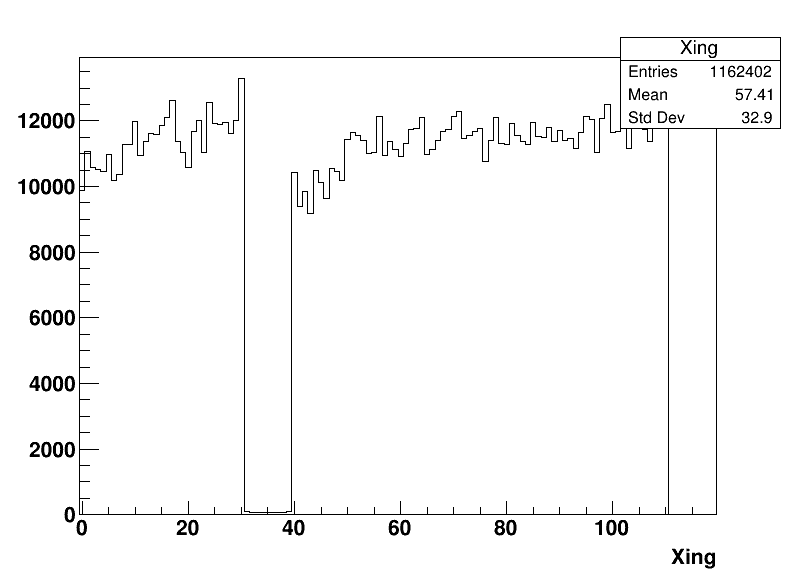

In [28]:
c = ROOT.TCanvas("c1","",800,600)
xing.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


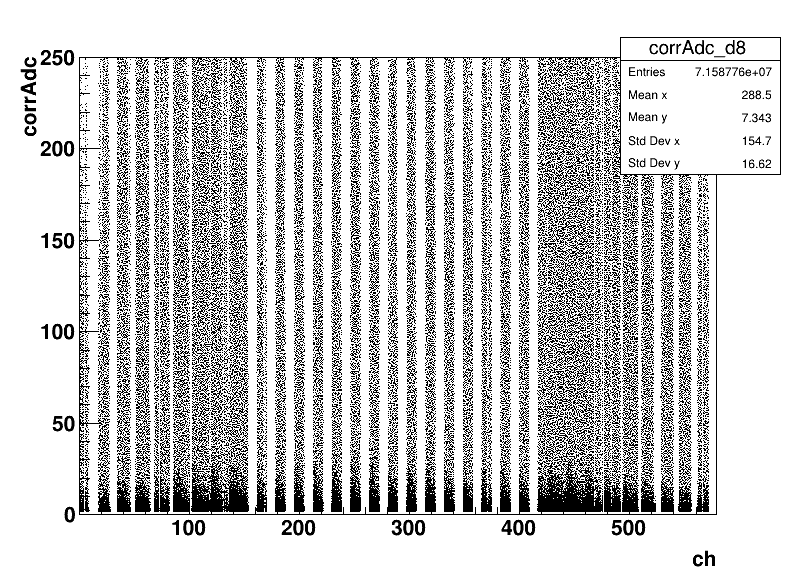

In [26]:
c = ROOT.TCanvas("c2", "", 800, 600)
file.Get('corrAdc_d8').Draw()
c.Draw()

In [21]:
xing.Draw()